# 1. Setup and Load Data

## 1.1 Install needed Libraries

In [79]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\virginia phan\appdata\local\programs\python\python39\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Virginia Phan\\AppData\\Local\\Temp\\pip-install-6jpsf8yf\\tensorflow-gpu\\setup.py'"'"'; __file__='"'"'C:\\Users\\Virginia Phan\\AppData\\Local\\Temp\\pip-install-6jpsf8yf\\tensorflow-gpu\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Virginia Phan\AppData\Local\Temp\pip-wheel-po4yf9c2'
       cwd: C:\Users\Virginia Phan\AppData\Local\Temp\pip-install-6jpsf8yf\tensorflow-gpu\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\Virginia Phan\AppData\Local\Temp\pip-install-6jpsf8yf\tensorflow-gpu\setup.py", line 37, in <module>
      raise Exception(TF_REMOVA

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\virginia phan\appdata\local\programs\python\python39\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Virginia Phan\\AppData\\Local\\Temp\\pip-install-t25hyc43\\tensorflow-gpu\\setup.py'"'"'; __file__='"'"'C:\\Users\\Virginia Phan\\AppData\\Local\\Temp\\pip-install-t25hyc43\\tensorflow-gpu\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Virginia Phan\AppData\Local\Temp\pip-wheel-07740a8d'
       cwd: C:\Users\Virginia Phan\AppData\Local\Temp\pip-install-t25hyc43\tensorflow-gpu\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\Virginia Phan\AppData\Local\Temp\pip-install-t25hyc43\tensorflow-gpu\setup.py", line 37, in <module>
      raise Exception(TF_REMOVA

In [80]:
!pip  list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
altgraph                     0.17
astroid                      2.4.2
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2020.12.5
chardet                      4.0.0
charset-normalizer           3.0.1
colorama                     0.4.4
comm                         0.1.2
contourpy                    1.0.5
cycler                       0.11.0
debugpy                      1.6.6
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.1.21
fonttools                    4.37.4
future                       0.18.2
gast                         0.4.0
google-auth                  2.16.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.51.1
h5py                         3.8.0
idna

You should consider upgrading via the 'c:\users\virginia phan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [81]:
import tensorflow as tf
import os

In [82]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [83]:
# Avoid OOM (OutOfMemomy) error by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove dodgy images

In [84]:
!pip install opencv-python

You should consider upgrading via the 'c:\users\virginia phan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [85]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [86]:
data_dir = 'data'

In [87]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [88]:
image_exts[1]

'jpg'

In [89]:
os.listdir(data_dir)

['happy', 'sad']

In [90]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '35438_hd.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'GettyImages-1152307607_525151_wrcmhy.jpg',
 'GettyImages-454356720.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'getty_494581822_130796.jpg',
 'getty_505175324_2000131020009280246_158016.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'group-of-happy-people-2.jpg',
 'group-of-young-happy-people-with-their-hands-up_369728-62.jpg',
 'habits-of-happy-people.jpg',
 'happiest.jpg',
 'Happiness-Habits-1

In [91]:
# Reading images using OpenCv
img = cv2.imread(os.path.join('data', 'happy', 'happiest.jpg'))

In [92]:
img.shape

(1131, 1698, 3)

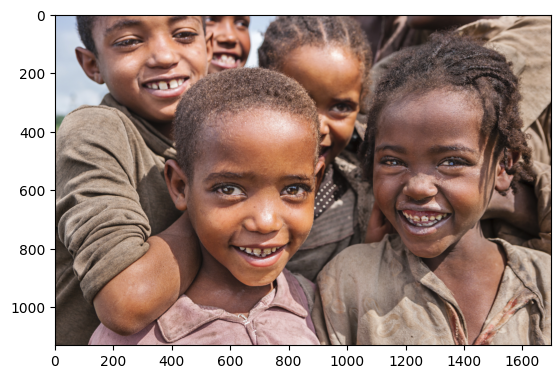

In [93]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [94]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in extension list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')



## 1.3 Load Data

In [95]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, s

In [96]:
import numpy as np
from matplotlib import pyplot as plt

In [97]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [98]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 148 files belonging to 2 classes.


In [99]:
data_iterator = data.as_numpy_iterator()

In [100]:
batch = data_iterator.next()

In [101]:
# Images represented as numpy arrays
batch[0]  #image
batch[1]  #label

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

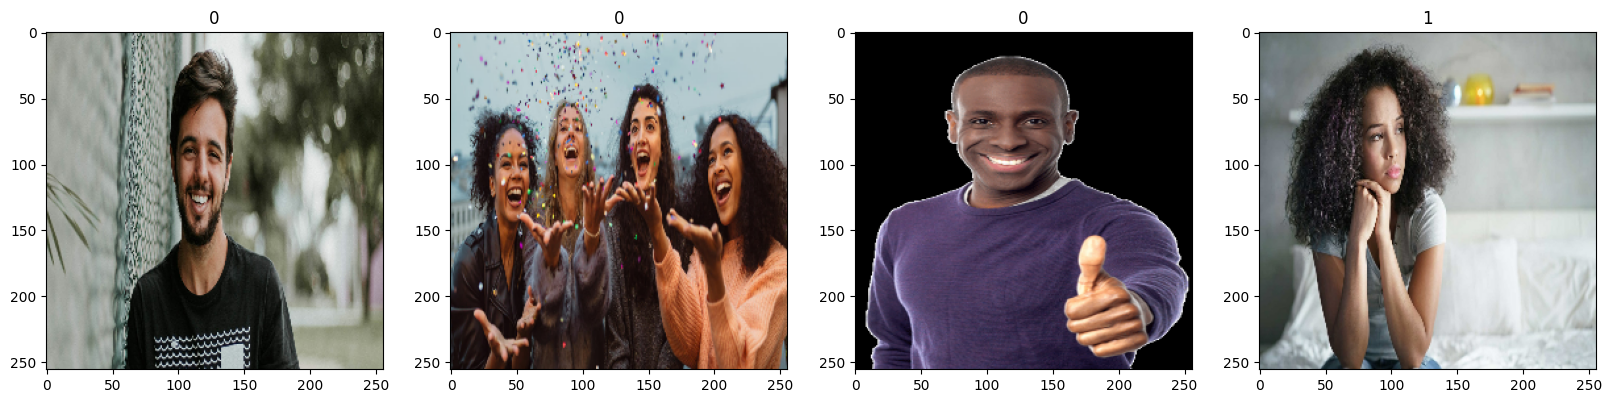

In [102]:
# Determine which images belong to which class
# Class 1 = SAD; Class 0 = HAPPY
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess data

# 2.1 Scale data

In [103]:
# Scaling data as the data is preprocessed through the data pipeline
# x represents the image, because the shape of the batch is 255, we divide x into 255 for scaling purpose
data = data.map(lambda x,y: (x/255, y))

In [104]:
scaled_iterator = data.as_numpy_iterator()

In [105]:
batch = scaled_iterator.next()

In [106]:
batch[0].max()

1.0

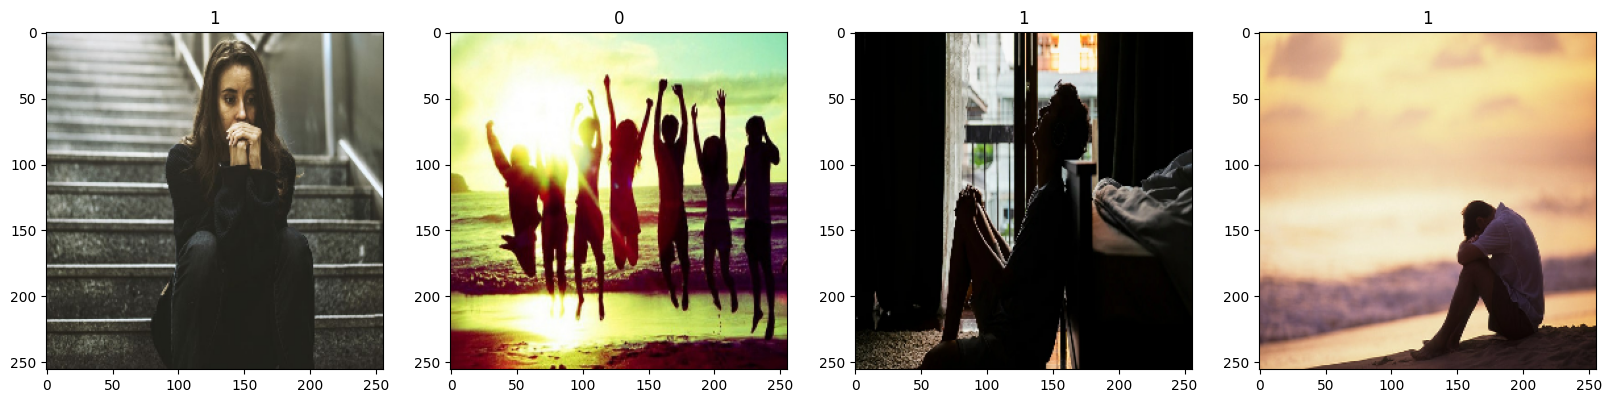

In [107]:
# Visualizing scaled data
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 2.2 Split Data

In [108]:
len(data)

5

In [109]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [110]:
train_size + val_size + test_size

5

In [111]:
#Validating sset is used to validate model WHILE we are training. Test dataset is used at the end of the training process (final validation state).

In [112]:
# take and skip methods inside tensorflow dataset pipeline.
# take method define how much data we are going to take in that particular partition. 
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [113]:
len(val)

1

# 3. Deep Model

# 3.1 Build Deep Learning Model

In [114]:
# Import neccesary independencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [115]:
model = Sequential()

In [116]:
# building Neural Network Architecture
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256, 256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [117]:
# optimizer: adam
tf.optimizers.Adam

keras.optimizers.optimizer_experimental.adam.Adam

In [118]:
# compiling
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [119]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

## 3.2 Train

In [120]:
# log the model
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [121]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks= [tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 8s 2s/step - loss: 1.2944 - accuracy: 0.5000 - val_loss: 0.9958 - val_accuracy: 0.4375
Epoch 2/20
3/3 [==============================] - 6s 2s/step - loss: 0.8204 - accuracy: 0.4271 - val_loss: 0.7114 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 7s 2s/step - loss: 0.7079 - accuracy: 0.5417 - val_loss: 0.6506 - val_accuracy: 0.5625
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 0.6351 - accuracy: 0.6250 - val_loss: 0.6354 - val_accuracy: 0.8750
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.6500 - accuracy: 0.8125 - val_loss: 0.6543 - val_accuracy: 0.7812
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.6206 - accuracy: 0.7708 - val_loss: 0.6193 - val_accuracy: 0.6250
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.6022 - accuracy: 0.6458 - val_loss: 0.5730 - val_accuracy: 0.7188
Epoch 8/20
3/3 [=========================

In [122]:
hist.history

{'loss': [1.2943803071975708,
  0.8203694820404053,
  0.7078803181648254,
  0.6351017951965332,
  0.6500479578971863,
  0.620552122592926,
  0.6022253036499023,
  0.5922217965126038,
  0.5313543677330017,
  0.49137210845947266,
  0.4603211581707001,
  0.386915922164917,
  0.3856022357940674,
  0.3402206003665924,
  0.3562854826450348,
  0.3774592876434326,
  0.23951782286167145,
  0.20665334165096283,
  0.18853652477264404,
  0.17411339282989502],
 'accuracy': [0.5,
  0.4270833432674408,
  0.5416666865348816,
  0.625,
  0.8125,
  0.7708333134651184,
  0.6458333134651184,
  0.625,
  0.8125,
  0.78125,
  0.8229166865348816,
  0.8333333134651184,
  0.84375,
  0.8645833134651184,
  0.8333333134651184,
  0.78125,
  0.9166666865348816,
  0.9270833134651184,
  0.9479166865348816,
  0.9479166865348816],
 'val_loss': [0.9957772493362427,
  0.7114256024360657,
  0.6505872011184692,
  0.6353878974914551,
  0.6543220281600952,
  0.6192948222160339,
  0.5730345249176025,
  0.4493390619754791,
  0.5

## 3.3 Plot Performance

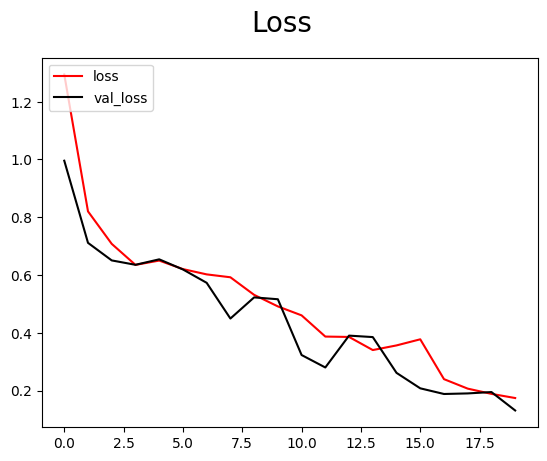

In [123]:
# Visualizing loss
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'black', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

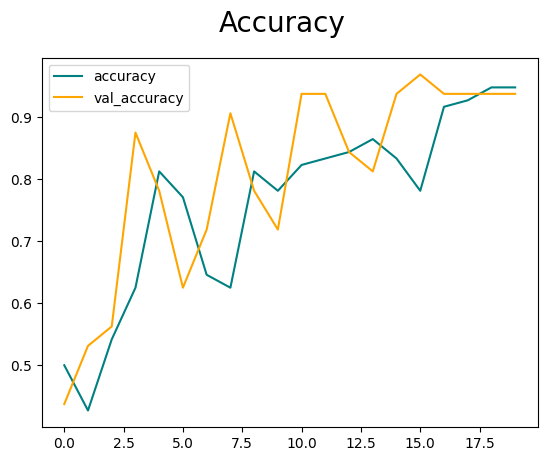

In [124]:
# Visualizing accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

# 4. Evaluate Performance

## 4.1 Evaluate

In [125]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [126]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [127]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 [==============================] - 0s 247ms/step


In [128]:
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


## 4.2 Testing

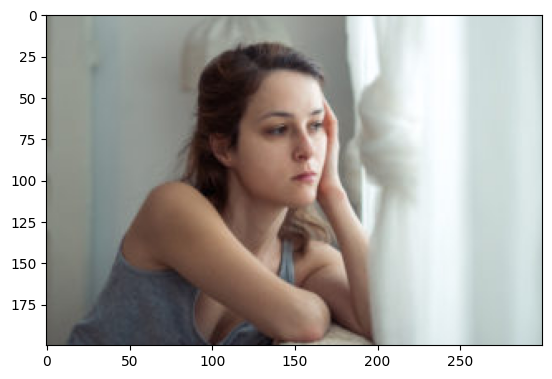

In [129]:
img = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

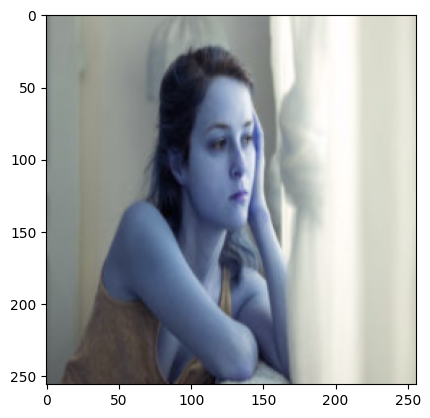

In [130]:
resize_image = tf.image.resize(img, (256, 256))
plt.imshow(resize_image.numpy().astype(int))
plt.show()

In [131]:
y_pred = model.predict(np.expand_dims(resize_image/255, 0))

1/1 [==============================] - 0s 40ms/step


In [132]:
y_pred

array([[0.83095115]], dtype=float32)

In [133]:
if y_pred > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


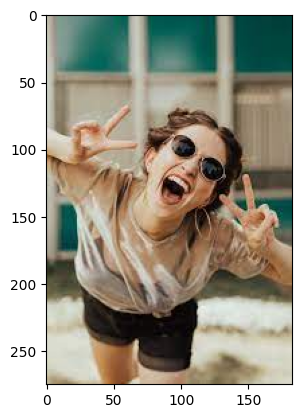

In [136]:
img_2 = cv2.imread('happy_test.jpg')
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.show()

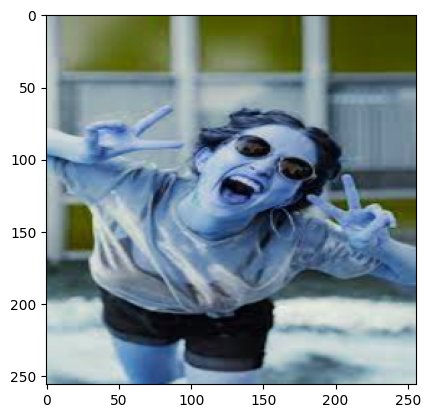

In [138]:
resize_img_2 = tf.image.resize(img_2, (256, 256))
plt.imshow(resize_img_2.numpy().astype(int))
plt.show()

In [139]:
y_predict = model.predict(np.expand_dims(resize_img_2, 0))

1/1 [==============================] - 0s 29ms/step


In [140]:
y_predict

array([[0.]], dtype=float32)

In [141]:
if y_predict > 0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

Predicted class is Happy


# 5. Save the Model

## 5.1 Save the Model

In [142]:
from tensorflow.keras.models import load_model

In [143]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [144]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [146]:
y_pred_new = new_model.predict(np.expand_dims(resize_image/255, 0))

1/1 [==============================] - 0s 85ms/step


In [147]:
if y_pred_new > 0.5:
    print(f'Predicted class is Sad')
else: 
    print(f'Predicted class is Happy')

Predicted class is Sad
